### Tarea 3: Cifrado de Imágenes con automatas
#### Jua$\eta$ Uri$\epsilon$l L$\epsilon$garia P$\epsilon \eta$ a



In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sumModulus2(a,b):
    return (a+b)%2

class ImageAutomatonCypher:
    
    def __init__(self,lambdaMinus1, lambda0, lambda1, T, path):
        self.lambdaMinus1 = lambdaMinus1
        self.lambda0 = lambda0
        self.lambda1 = lambda1
        self.T = T
        #Abrimos la imágen con la ruta especificada por el usuario
        #convert('L') convierte a escala de grises
        img = Image.open(path).convert('L')
        img = np.asarray(img)
        self.img = img
    
    def encodeImage(self):
        bitImage = self.constructBitImage(self.img)
        n = np.size(bitImage,0)
        m = np.size(bitImage,1)
        i = 0
        encodedBitImage = np.zeros((n,m))
        while(i < n-1):
            automatonEvolution = np.zeros((self.T +2, m))
            automatonEvolution[0,:] = bitImage[i,:]
            automatonEvolution[1,:] = bitImage[i+1,:]
            #Evolucionamos el automata
            for j in range(2, self.T + 2):
                for s in range(0,m):
                    automatonEvolution[j,s] = sumModulus2(sumModulus2(sumModulus2(self.lambdaMinus1*automatonEvolution[j-1,(s-1)%m],self.lambda0*automatonEvolution[j-1,s]),self.lambda1*automatonEvolution[j-1,(s+1)%m]),automatonEvolution[j-2,s]) 
            encodedBitImage[i,:] = automatonEvolution[self.T,:]
            encodedBitImage[i+1,:] = automatonEvolution[self.T+1,:]
            i = i + 2
        
        self.encodedBitImage = encodedBitImage
        self.encodedImage = self.reconstructImage(encodedBitImage)
    
    
    def decodeImage(self, image):
            bitImage = self.constructBitImage(image)
            n = np.size(bitImage,0)
            m = np.size(bitImage,1)
            i = 0
            decodedBitImage = np.zeros((n,m))
            while(i < n-1):
                automatonEvolution = np.zeros((self.T+2, m))
                automatonEvolution[0,:] = bitImage[i+1,:]
                automatonEvolution[1,:] = bitImage[i,:]
                #Evolucionamos el automata
                for j in range(2, self.T + 2):
                    for s in range(0,m):
                        automatonEvolution[j,s] = sumModulus2(sumModulus2(sumModulus2(self.lambdaMinus1*automatonEvolution[j-1,(s-1)%m],self.lambda0*automatonEvolution[j-1,s]),self.lambda1*automatonEvolution[j-1,(s+1)%m]),automatonEvolution[j-2,s])
            
                decodedBitImage[i,:] = automatonEvolution[self.T,:]
                decodedBitImage[i+1,:] = automatonEvolution[self.T+1,:]
                i = i + 2
        
            self.decodedBitImage = decodedBitImage
            self.decodedImage = self.reconstructImage(decodedBitImage)
        
    def constructBitImage(self, image):
        n = np.size(image,0)
        m = np.size(image,1)
        if(n%2 != 0):
            n = n-1
        bitImage = np.zeros((n,m*8))
        for i in range(0,n):
            row = image[i,:]
            for j in range(0,m-8):
                #Convertimos a bits
                bits = [int(x) for x in '{:08b}'.format(int(row[j]))]
                bitImage[i,j*8:(j*8 +8)] = bits
        
        return bitImage
    
    def reconstructImage(self, bitImage):
        n = np.size(bitImage,0)
        m = np.size(bitImage,1)
        image = np.zeros((n,int(m/8)))
        for i in range(0,n):
            row = bitImage[i,:]
            for j in range(0,int(m/8)-8):
                bits = row[j*8:(j*8+8)]
                number = int("".join(str(int(i)) for i in bits),2)
                image[i,j] = number
        
        return image

#### 1.- Codificación

In [4]:
lambdaMinus1 = 1
lambda0 = 0
lambda1 = 1
T = 3

c = ImageAutomatonCypher(lambdaMinus1,lambda0,lambda1,T,"hero.jpg")
c.encodeImage()

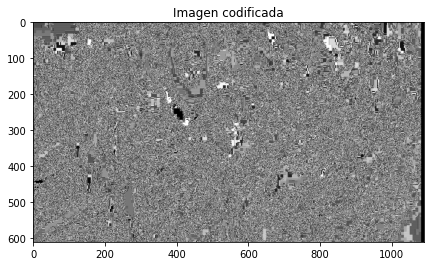

In [5]:
plt.figure(figsize = (7,7))
plt.title("Imagen codificada")
plt.imshow(c.encodedImage, cmap = "gray")

#### 2.- Decodificación

In [6]:
c.decodeImage(c.encodedImage)

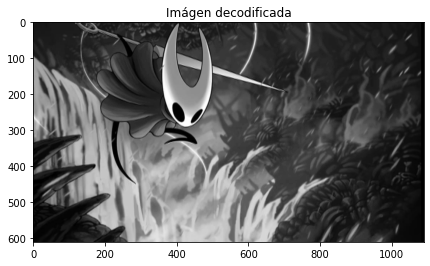

In [7]:
plt.figure(figsize = (7,7))
plt.title("Imágen decodificada")
plt.imshow(c.decodedImage, cmap = "gray")